In [ ]:
#To get just the data related to posts, click on this link (https://www.facebook.com/dyi/?referrer=yfi_settings).Change the requested file format from HTML to JSON, and then deselect everything from the options below, check off only posts, and hit Create File.Facebook will notify you when your file has been created and is ready for download — it could take a while, depending on your Facebook history and options.

#Download the zip file, unzip it, and look for the posts folder and a file called your_posts_1.json.

In [4]:
import pandas as pd

# reading the json file into the dataframe

df = pd.read_json('C:/Users/rishi/Desktop/Python projects/Facebook post Analysis/your_posts_1.json')
df.head(5)

,timestamp,data,title,attachments,tags
0,2011-01-02 08:31:05,[{'post': 'happy new year to all......'}],Rishika Drona updated her status.,NaN,NaN
1,2011-10-26 09:19:58,[{'post': 'a very happy diwali to all.... enjo...,Rishika Drona updated her status.,NaN,NaN
2,2011-11-23 08:15:58,[{'post': 'bought 2 of my favourite novels tod...,Rishika Drona updated her status.,NaN,NaN
3,2011-12-01 12:58:35,[{'post': 'i thought a thought bt d thought i ...,Rishika Drona updated her status.,NaN,NaN
4,2011-12-25 09:50:38,[{'post': 'a merry christmas to all......... h...,Rishika Drona updated her status.,NaN,NaN


In [5]:
# Some of our columns have nested sub-columns in each row that are still in JSON format.
# To ensure that timestamp column is in the right format by converting it to a datetime object.

df.rename(columns = {'timestamp':'date'}, inplace = True)

# Dropping some unnecessary columns
df = df.drop(['attachments','title','tags'], axis = 1)

# Making sure to format the datetime again
pd.to_datetime(df['date'])

df.head(5)


,date,data
0,2011-01-02 08:31:05,[{'post': 'happy new year to all......'}]
1,2011-10-26 09:19:58,[{'post': 'a very happy diwali to all.... enjo...
2,2011-11-23 08:15:58,[{'post': 'bought 2 of my favourite novels tod...
3,2011-12-01 12:58:35,[{'post': 'i thought a thought bt d thought i ...
4,2011-12-25 09:50:38,[{'post': 'a merry christmas to all......... h...


In [6]:
# To count the number the rows
print(df.shape)

# To print the end of the dataframe
df.tail(5)

(248, 2)


,date,data
243,2018-12-06 15:41:55,[{'post': 'Happy bâday..ð'}]
244,2018-12-07 12:39:07,[{'post': 'Happy bâday..ðð'}]
245,2019-02-20 07:16:00,[{'post': 'Many many happy returns of d day......
246,2019-04-17 17:41:35,[{'post': 'Happy bâday..ð'}]
247,2019-06-02 06:50:10,[{'post': 'Happy bâday tanvi..ð'}]


In [7]:
# Step 1: To find out the monthly post count
# To get the data into a format that tells us something about post frequency. Given that the spanning years of history here, looking at it month-to-month makes the most sense.
# Two main steps would be performed. first, setting the data column as the index of our dataframe.Second, to resample the data by month, then counting the posts occuring in each month.

# Selecting the coulumn we want to resample
df = df.set_index('date')

# Using the.resample() functionwith the argument MS(Month Start) to resample our data by month.Using of .size() to specify what we want to measure each month.
post_counts = df['data'].resample('MS').size() 

# Assigning the resulting series to a variable called post_counts.
post_counts

#  This would get our posts counts broken down by month.

date
2011-01-01    1
2011-02-01    0
2011-03-01    0
2011-04-01    0
2011-05-01    0
             ..
2019-02-01    1
2019-03-01    0
2019-04-01    1
2019-05-01    0
2019-06-01    1
Freq: MS, Name: data, Length: 102, dtype: int64

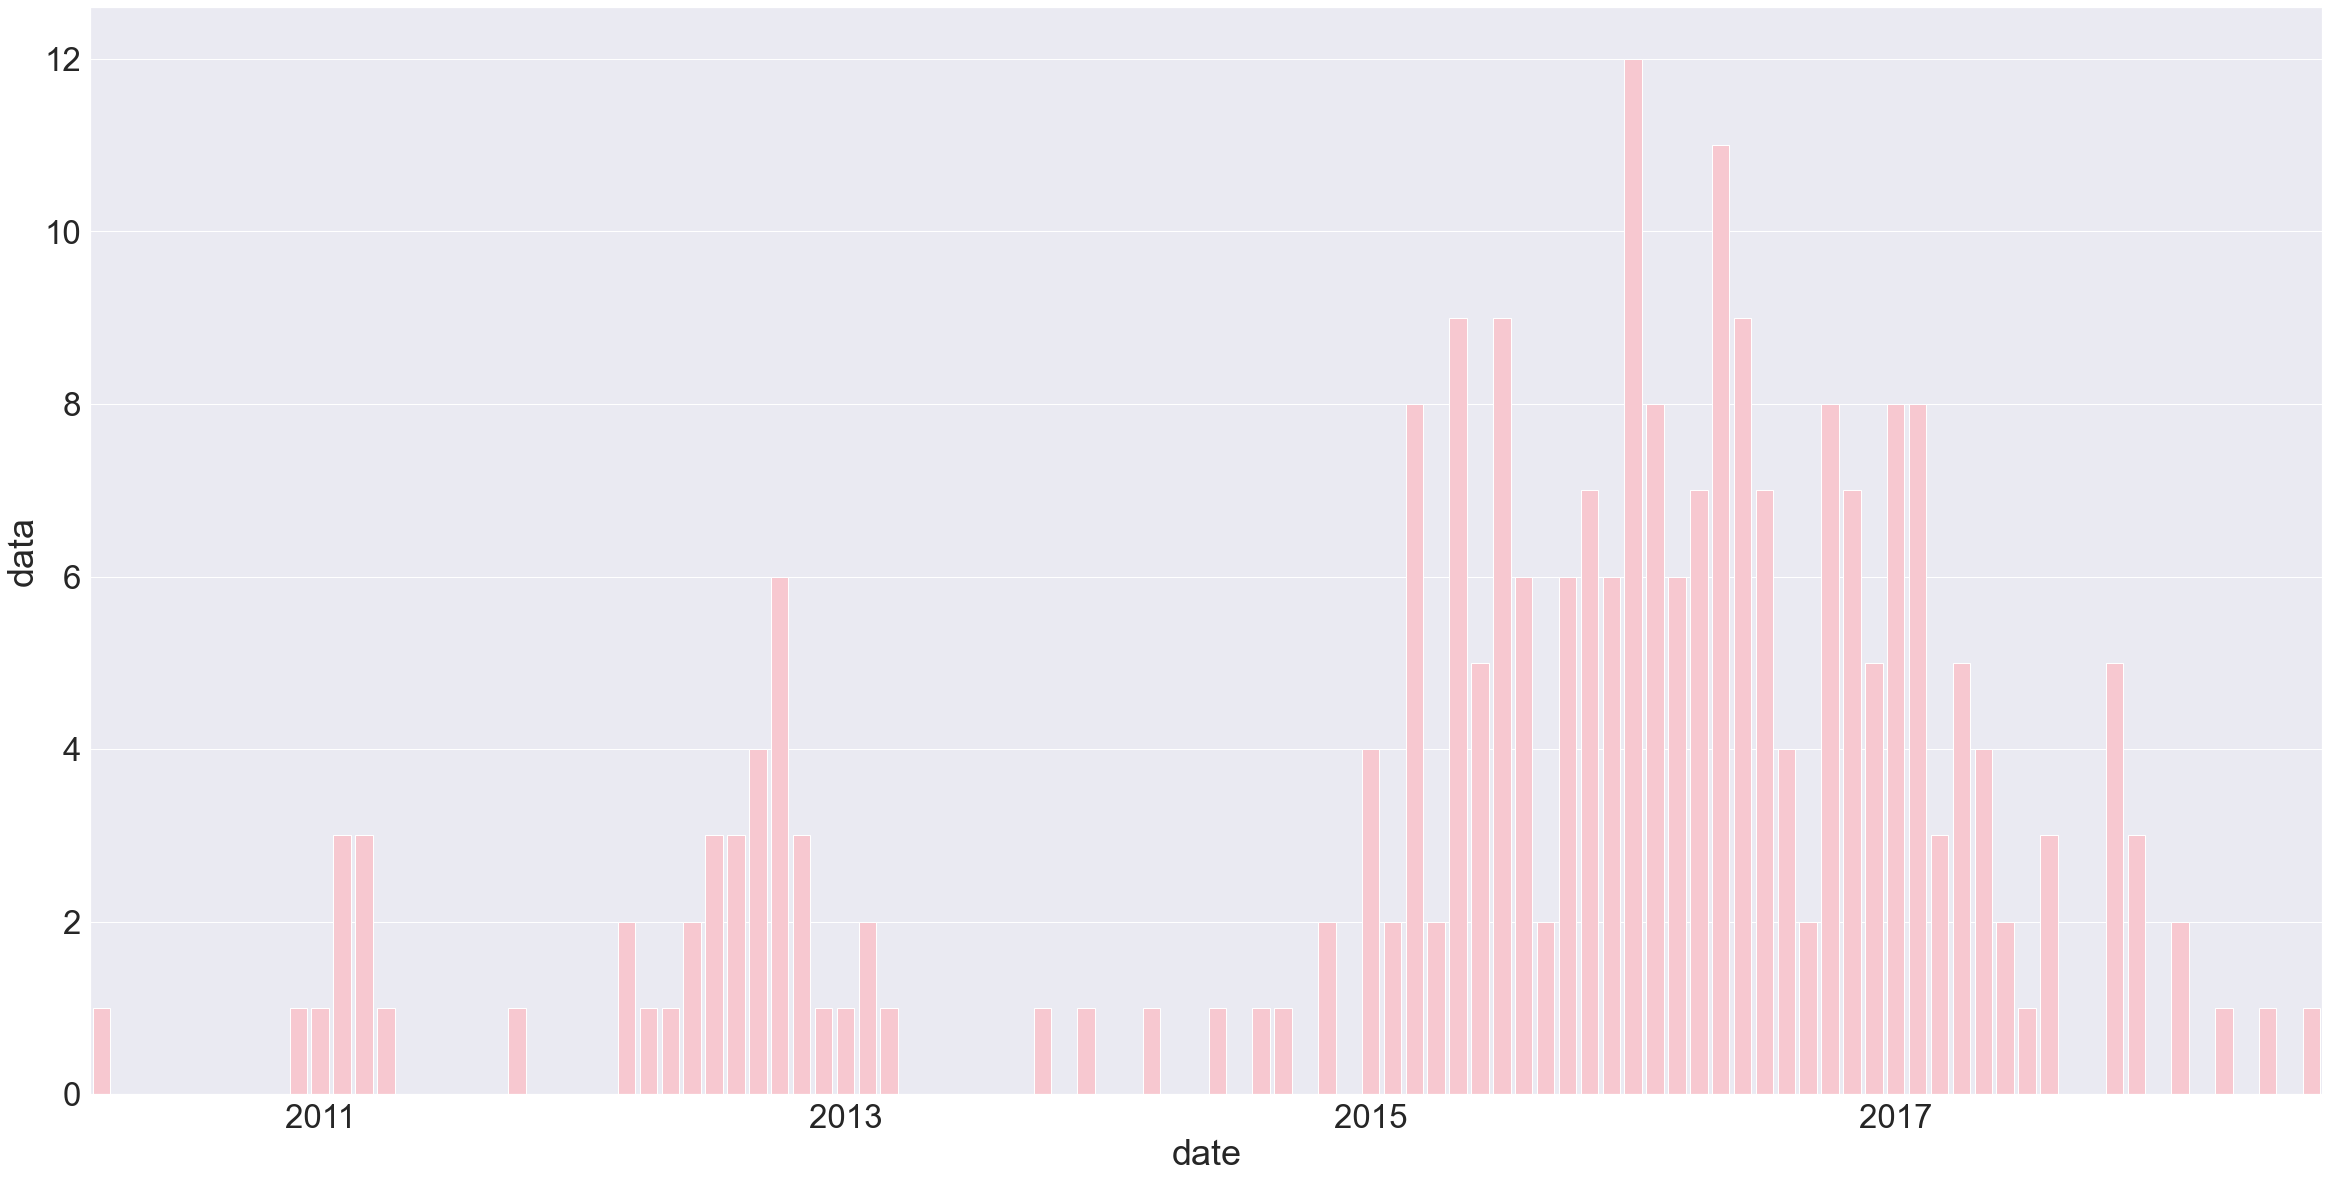

In [13]:
# Step 2: Visualizing the Facebook usage

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#setting the figure size and font size
sns.set (rc={'figure.figsize': (40,20)})
sns.set(font_scale = 3)

# Setting the x labels
x_labels = post_counts.index

# Creating the bar plot
sns.barplot(x_labels,post_counts,color ="Pink")

# Command to show only the x-axis labels for January 1 of every year
tick_positions = np.arange(10,len(x_labels), step = 24)

# Reformatting the date to display the year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# Display the plot
plt.show()

